# Data Space Report


<img src="images/polito_logo.png" alt="Polito Logo" style="width: 200px;"/>


## Pittsburgh Bridges Data Set

<img src="images/andy_warhol_bridge.jpg" alt="Andy Warhol Bridge" style="width: 200px;"/>

    Andy Warhol Bridge - Pittsburgh.

Report created by Student Francesco Maria Chiarlo s253666, for A.A 2019/2020.

**Abstract**:The aim of this report is to evaluate the effectiveness of distinct, different statistical learning approaches, in particular focusing on their characteristics as well as on their advantages and backwards when applied onto a relatively small dataset as the one employed within this report, that is Pittsburgh Bridgesdataset.

**Key words**:Statistical Learning, Machine Learning, Bridge Design.

## TOC:
* [Imports Section](#imports-section)
* [Dataset's Attributes Description](#attributes-description)
* [Data Preparation and Investigation](#data-preparation)
* [Learning Models](#learning-models)
* [Improvements and Conclusions](#improvements-and-conclusions)
* [References](#references)

### Imports Section <a class="anchor" id="imports-section"></a>

In [1]:
# =========================================================================== #
# STANDARD IMPORTS
# =========================================================================== #
print(__doc__)

from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

import copy
import os
import sys
import time

import pandas as pd
import numpy as np

%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns; sns.set()

Automatically created module for IPython interactive environment


In [2]:
# =========================================================================== #
# UTILS IMPORTS (Done by myself)
# =========================================================================== #
from utils.display_utils import display_heatmap
from utils.display_utils import show_frequency_distribution_predictors
from utils.display_utils import show_frequency_distribution_predictor
from utils.display_utils import build_boxplot
from utils.display_utils import show_categorical_predictor_values
from utils.display_utils import  show_cum_variance_vs_components

from utils.preprocessing_utils import preprocess_categorical_variables
from utils.preprocessing_utils import  preprocessing_data_rescaling

from utils.training_utils import sgd_classifier_grid_search
from utils.training_utils import naive_bayes_classifier_grid_search
from utils.training_utils import svm_linear_classifier_grid_search
from utils.training_utils import decision_tree_classifier_grid_search
from utils.training_utils import random_forest_classifier_grid_search
from utils.training_utils import plot_roc_crossval

In [3]:
# =========================================================================== #
# sklearn IMPORT
# =========================================================================== #
from sklearn.decomposition import PCA

### Dataset's Attributes Description <a class="anchor" id="attributes-description"></a>

The analyses that I aim at accomplishing while using as means the methods or approaches provided by both Statistical Learning and Machine Learning fields, concern the dataset Pittsburgh Bridges, and what follows is a overview and brief description of the main characteristics, as well as, basic information about this precise dataset.

The Pittsburgh Bridges dataset is a dataset available from the web site called mainly *"UCI Machine Learing Repository"*, which is one of the well known web site that let a large amount of different datasets, from different domains or fields, to be used for machine-learning research and which have been cited in peer-reviewed academic journals.

In particular, the dataset I'm going to treat and analyze, which is Pittsburgh Bridges dataset, has been made freely available from the Western Pennsylvania Regional Data Center (WPRDC), which is a project led by the University Center of Social and Urban Research (UCSUR) at the University of Pittsburgh ("University") in collaboration with City of Pittsburgh and The County of Allegheny in Pennsylvania. The WPRDC and the WPRDC Project is supported by a grant from the Richard King Mellon Foundation.

In order to be more precise, from the official and dedicated web page, within UCI Machine Learning cite, Pittsburgh Bridges dataset is a dataset that has been created after the works of some co-authors which are:
- Yoram Reich & Steven J. Fenves from Department of Civil Engineering and Engineering Design Research Center Carnegie Mellon University Pittsburgh, PA 15213

The Pittsburgh Bridges dataset is made of up to 108 distinct observations and each of that data sample is made of 12 attributes or features where some of them are considered to be continuous properties and other to be categorical or nominal properties. Those variables are the following:

- **RIVER**: which is a nominal type variable that can assume the subsequent possible discrete values which are: A, M, O. Where A stands for Allegheny river, while M stands for Monongahela river and lastly O stands for Ohio river.
- **LOCATION**: which represents a nominal type variable too, and assume a positive integer value from 1 up to 52 used as categorical attribute.
- **ERECTED**: which might be either a numerical or categorical variable, depending on the fact that we want to aggregate a bunch of value under a categorical quantity. What this means is that, basically such attribute is made of date starting from 1818 up to 1986, but we may imagine to aggregate somehow these data within a given category among those suggested, that are CRAFTS, EMERGENING, MATURE, MODERN.
- **PURPOSE**: which is a categorical attribute and represents the reason why a particular bridge has been built, which means that this attribute represents what kind of vehicle can cross the bridge or if the bridge has been made just for people. For this reasons the allowd values for this attributes are the following: WALK, AQUEDUCT, RR, HIGHWAY. Three out of four are self explained values, while RR value that might be tricky at first glance, it just stands for railroad.
- **LENGTH**: which represents the bridge's length, is a numerical attribute if we just look at the real number values that go from 804 up to 4558, but we can again decide to handle or arrange such values so that they can be grouped into range of values mapped into SHORT, MEDIUM, LONG so that we can refer to a bridge's length by means of these new categorical values.
- **LANES**: which is a categorical variable which is represented by numerical values, that are 1, 2, 4, 6 which indicate the number of distinct lanes that a bridge in Pittsburgh city may have. The larger the value the wider the bridge.
- **CLEAR-G**: specifies  whether  a  vertical  navigation clearance requirement was enforced in the design or not.
- **T-OR-D**: which is a nominal attribute, in other words, a categorical attribute that can assume THROUGH, DECK values. In order to be more precise, this samples attribute deals with structural elements of a bridge. In fact, a deck is the surface of a bridge and this structural element, of bridge's superstructure, may be constructed of concrete, steel, open grating, or wood. On the other hand, a through arch bridge, also known as a half-through arch bridge or a through-type arch bridge, is a bridge that is made from materials such as steel or reinforced concrete, in which the base of an arch structure is below the deck but the top rises above it.
- **MATERIAL**: which is a categorical or nominal variable and is used to describe the bridge telling which is the main or core material used to build it.
  This attribute can assume one of the possible, following values which are: WOOD, IRON, STEEL. Furthermore, we expect to see somehow a bit of correlation between the values assumed by the pairs represented by T-OR-D and MATERIAL columns, when looking just to them.
- **SPAN**: which is a categorical or nominal value and has been recorded by means of three possible values for each sample, that are SHORT, MEDIUM, LONG. This attribute, within the field of Structural Engineering, is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. 
- **REL-L**: which is a categorical or nominal variable and stands for relative length of the main span of the bridge to the total crossing length, it can assume three possible values that are S, S-F, F.
- Lastly, **TYPE** which indicates as a categorical or nominal attributes what type of bridge each record represents, among the possible 6 distinct classes or types of bridges that are: WOOD, SUSPEN, SIMPLE-T, ARCH, CANTILEV, CONT-T.

### Data Preparation and Investigation <a class="anchor" id="data-preparation"></a>

The aim of this chapter is to get in the data, that are available within Pittsburgh Bridge Dataset, in order to investigate a bit more in to detail and generally speaking deeper the main or high level statistics quantities, such as mean, median, standard deviation of each attribute, as well as displaying somehow data distribution for each attribute by means of histogram plots. This phase allows or enables us to decide which should be the best feature to be selected as the target variable, in other word the attribute that will represent the dependent variable with respect to the remaining attributes that instead will play the role of predictors and independent variables, as well.

In order to investigate and explore our data we make usage of *Pandas library*. We recall mainly that, in computer programming, Pandas is a software library written for the Python programming language* for *data manipulation and analysis*. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software and a interesting and funny things about such tool is that the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.
We also note that as the analysis proceeds we will introduce other computer programming as well as programming libraries that allow or enable us to fulfill our goals.

Initially, once I have downloaded from the provided web page the dataset with the data samples about Pittsburgh Bridge we load the data by means of functions available using python library's pandas. We notice that the overall set of data points is large up to 108 records or rows, which are sorted by Erected attributes, so this means that are sorted in decreasing order from the oldest bridge which has been built in 1818 up to the most modern bridge that has been erected in 1986. Then we display the first 5 rows to get an overview and have a first idea about what is inside the overall dataset, and the result we obtain by means of head() function applied onto the fetched dataset is equals to what follows:

In [4]:
# =========================================================================== #
# READ INPUT DATASET
# =========================================================================== #

dataset_path = 'C:\\Users\\Utente\\Desktop\\FRANCESCO\\data_science\\datasets_repository\\pittsburgh_dataset'
dataset_name = 'bridges.data.csv'

# column_names = ['IDENTIF', 'RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
column_names = ['RIVER', 'LOCATION', 'ERECTED', 'PURPOSE', 'LENGTH', 'LANES', 'CLEAR-G', 'T-OR-D', 'MATERIAL', 'SPAN', 'REL-L', 'TYPE']
dataset = pd.read_csv(os.path.join(dataset_path, dataset_name), names=column_names, index_col=0)

In [5]:
# SHOW SOME STANDARD DATASET INFOS
# --------------------------------------------------------------------------- #
print('Dataset shape: {}'.format(dataset.shape))
print(dataset.info())

Dataset shape: (108, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, E1 to E109
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     108 non-null    object
 1   LOCATION  108 non-null    object
 2   ERECTED   108 non-null    int64 
 3   PURPOSE   108 non-null    object
 4   LENGTH    108 non-null    object
 5   LANES     108 non-null    object
 6   CLEAR-G   108 non-null    object
 7   T-OR-D    108 non-null    object
 8   MATERIAL  108 non-null    object
 9   SPAN      108 non-null    object
 10  REL-L     108 non-null    object
 11  TYPE      108 non-null    object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB
None


In [6]:
# SHOWING FIRSTS N-ROWS AS THEY ARE STORED WITHIN DATASET
# --------------------------------------------------------------------------- #
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


What we can notice from just the table above is that there are some attributes that are characterized by a special character that is '?' which stands for a missing value, so by chance there was not possibility to get the value for this attribute, such as for LENGTH and SPAN attributes. Analyzing in more details the dataset we discover that there are up to 6 different attributes, in the majority attributes with categorical or nominal nature such as CLEAR-G, T-OR-D, MATERIAL, SPAN, REL-L, and TYPE that contain at list one row characterized by the fact that one of its attributes is set to assuming '?' value that stands, as we already know for a missing value.

Here, we can follow different strategies that depends onto the level of complexity as well as accuracy we want to obtain or achieve for models we are going to fit to the data after having correctly pre-processed them, speaking about what we could do with missing values. In fact one can follow the simplest way and can decide to simply discard those rows that contain at least one attribute with a missing value represented by the '?' symbol. Otherwise one may alos decide to follow a different strategy that aims at keeping also those rows that have some missing values by means of some kind of technique that allows to establish a potential substituting value for the missing one.

So, in this setting, that is our analyses, we start by just leaving out those rows that at least contain one attribute that has a missing value, this choice leads us to reduce the size of our dataset from 108 records to 70 remaining samples, with a drop of 38 data examples, which may affect the final results, since we left out more or less the 46\% of the data because of missing values.

In [7]:
# INVESTIGATING DATASET IN ORDER TO DETECT NULL VALUES
# --------------------------------------------------------------------------- #
print('Before preprocessing dataset and handling null values')
result = dataset.isnull().values.any()
print('There are any null values ? Response: {}'.format(result))

result = dataset.isnull().sum()
print('Number of null values for each predictor:\n{}'.format(result))

Before preprocessing dataset and handling null values
There are any null values ? Response: False
Number of null values for each predictor:
RIVER       0
LOCATION    0
ERECTED     0
PURPOSE     0
LENGTH      0
LANES       0
CLEAR-G     0
T-OR-D      0
MATERIAL    0
SPAN        0
REL-L       0
TYPE        0
dtype: int64


In [8]:
# DISCOVERING VALUES WITHIN EACH PREDICTOR DOMAIN
# --------------------------------------------------------------------------- #
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION', 'LANES']
# columns_2_avoid = None
list_columns_2_fix = show_categorical_predictor_values(dataset, columns_2_avoid)

RIVER  :  ['A', 'M', 'O', 'Y']
PURPOSE  :  ['AQUEDUCT', 'HIGHWAY', 'RR', 'WALK']
CLEAR-G  :  ['?', 'G', 'N']
T-OR-D  :  ['?', 'DECK', 'THROUGH']
MATERIAL  :  ['?', 'IRON', 'STEEL', 'WOOD']
SPAN  :  ['?', 'LONG', 'MEDIUM', 'SHORT']
REL-L  :  ['?', 'F', 'S', 'S-F']
TYPE  :  ['?', 'ARCH', 'CANTILEV', 'CONT-T', 'NIL', 'SIMPLE-T', 'SUSPEN', 'WOOD']


In [9]:
# FIXING, UPDATING NULL VALUES CODED AS '?' SYMBOL
# WITHIN EACH CATEGORICAL VARIABLE, IF DETECTED ANY
# --------------------------------------------------------------------------- #
print('Before', dataset.shape)
for _, predictor in enumerate(list_columns_2_fix):
    dataset = dataset[dataset[predictor] != '?']
print('After', dataset.shape)

_ = show_categorical_predictor_values(dataset, columns_2_avoid)

Before (108, 12)
After (88, 12)
RIVER  :  ['A', 'M', 'O', 'Y']
PURPOSE  :  ['AQUEDUCT', 'HIGHWAY', 'RR']
CLEAR-G  :  ['G', 'N']
T-OR-D  :  ['DECK', 'THROUGH']
MATERIAL  :  ['IRON', 'STEEL', 'WOOD']
SPAN  :  ['LONG', 'MEDIUM', 'SHORT']
REL-L  :  ['F', 'S', 'S-F']
TYPE  :  ['ARCH', 'CANTILEV', 'CONT-T', 'SIMPLE-T', 'SUSPEN', 'WOOD']


In [10]:
# INTERMEDIATE RESULT FOUND
# --------------------------------------------------------------------------- #
preprocess_categorical_variables(dataset, columns_2_avoid)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     88 non-null     int64 
 1   LOCATION  88 non-null     object
 2   ERECTED   88 non-null     int64 
 3   PURPOSE   88 non-null     int64 
 4   LENGTH    88 non-null     object
 5   LANES     88 non-null     object
 6   CLEAR-G   88 non-null     int64 
 7   T-OR-D    88 non-null     int64 
 8   MATERIAL  88 non-null     int64 
 9   SPAN      88 non-null     int64 
 10  REL-L     88 non-null     int64 
 11  TYPE      88 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 8.9+ KB
None


In [11]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


The next step is represented by the effort of mapping categorical variables into numerical variables, so that them are comparable with the already existing numerical or continuous variables, and also by mapping the categorical variables into numerical variables we allow or enable us to perform some kind of normalization or just transformation onto the entire dataset in order to let some machine learning algorithm to work better or to take advantage of normalized data within our pre-processed dataset. Furthermore, by transforming first the categorical attributes into a continuous version we are also able to calculate the \textit{heatmap}, which is a very useful way of representing a correlation matrix calculated on the whole dataset. Moreover we have displayed data distribution for each attribute by means of histogram representation to take some useful information about the number of occurrences for each possible value, in particular for those attributes that have a categorical nature.

In [12]:
# MAP NUMERICAL VALUES TO INTEGER VALUES
# --------------------------------------------------------------------------- #
print('Before', dataset.shape)
columns_2_map = ['ERECTED', 'LANES']
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: int(x), dataset[predictor].values)))
print('After', dataset.shape)
print(dataset.info())
print(dataset.head(5))

Before (88, 12)
After (80, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     80 non-null     int64 
 1   LOCATION  80 non-null     object
 2   ERECTED   80 non-null     int32 
 3   PURPOSE   80 non-null     int64 
 4   LENGTH    80 non-null     object
 5   LANES     80 non-null     int32 
 6   CLEAR-G   80 non-null     int64 
 7   T-OR-D    80 non-null     int64 
 8   MATERIAL  80 non-null     int64 
 9   SPAN      80 non-null     int64 
 10  REL-L     80 non-null     int64 
 11  TYPE      80 non-null     int64 
dtypes: int32(2), int64(8), object(2)
memory usage: 7.5+ KB
None
    RIVER LOCATION  ERECTED  PURPOSE LENGTH  LANES  CLEAR-G  T-OR-D  MATERIAL  \
E1      2        3     1818        2      ?      2        2       2         3   
E2      1       25     1819        2   1037      2        2       2         3   
E5      1       29     1837  

In [13]:
# MAP NUMERICAL VALUES TO FLOAT VALUES
# --------------------------------------------------------------------------- #
# print('Before', dataset.shape)
columns_2_map = ['LOCATION', 'LANES', 'LENGTH']    
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: float(x), dataset[predictor].values)))
# print('After', dataset.shape)    
# print(dataset.info())
# print(dataset.head(5))

# columns_2_avoid = None
list_columns_2_fix = show_categorical_predictor_values(dataset, None)

RIVER  :  [1, 2, 3]
LOCATION  :  [1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, 12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 38.5, 39.5, 39.7, 40.0, 41.0, 42.0, 43.0, 44.0, 46.0, 47.0, 48.0, 49.0]
ERECTED  :  [1819, 1837, 1840, 1844, 1846, 1851, 1856, 1859, 1864, 1866, 1870, 1876, 1883, 1884, 1887, 1888, 1890, 1891, 1892, 1895, 1896, 1897, 1898, 1900, 1902, 1903, 1904, 1909, 1910, 1911, 1915, 1918, 1920, 1923, 1924, 1926, 1927, 1928, 1931, 1937, 1939, 1945, 1950, 1951, 1955, 1959, 1961, 1962, 1969, 1975, 1978]
PURPOSE  :  [1, 2, 3]
LENGTH  :  [840.0, 860.0, 870.0, 884.0, 885.0, 900.0, 950.0, 965.0, 980.0, 990.0, 1000.0, 1030.0, 1031.0, 1037.0, 1040.0, 1060.0, 1092.0, 1150.0, 1161.0, 1200.0, 1300.0, 1320.0, 1330.0, 1350.0, 1365.0, 1417.0, 1450.0, 1500.0, 1620.0, 1652.0, 1690.0, 1700.0, 1710.0, 1730.0, 1770.0, 1800.0, 1850.0, 2000.0, 2122.0, 2160.0, 2213.0, 2220.0, 2250.0, 2300.0, 236

In [14]:
result = dataset.isnull().values.any()
# print('After handling null values\nThere are any null values ? Response: {}'.format(result))

result = dataset.isnull().sum()
# print('Number of null values for each predictor:\n{}'.format(result))

dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E2,1,25.0,1819,2,1037.0,2.0,2,2,3,3,2,6
E5,1,29.0,1837,2,1000.0,2.0,2,2,3,3,2,6
E7,1,27.0,1840,2,990.0,2.0,2,2,3,2,2,6
E8,1,28.0,1844,1,1000.0,1.0,2,2,1,3,2,5
E9,2,3.0,1846,2,1500.0,2.0,2,2,1,3,2,5


In [15]:
dataset.describe(include='all')

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.642857,25.438571,1911.542857,2.214286,1597.657143,2.857143,1.257143,1.814286,2.071429,1.742857,1.728571,3.457143
std,0.723031,13.223347,36.010339,0.478308,780.237680,1.242785,0.440215,0.391684,0.428054,0.629831,0.797122,1.575958
min,1.000000,1.000000,1819.000000,1.000000,840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,15.250000,1891.250000,2.000000,1000.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.500000,27.000000,1915.000000,2.000000,1325.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
75%,2.000000,35.750000,1935.500000,2.000000,2000.000000,4.000000,1.750000,2.000000,2.000000,2.000000,2.000000,4.000000
max,3.000000,49.000000,1978.000000,3.000000,4558.000000,6.000000,2.000000,2.000000,3.000000,3.000000,3.000000,6.000000


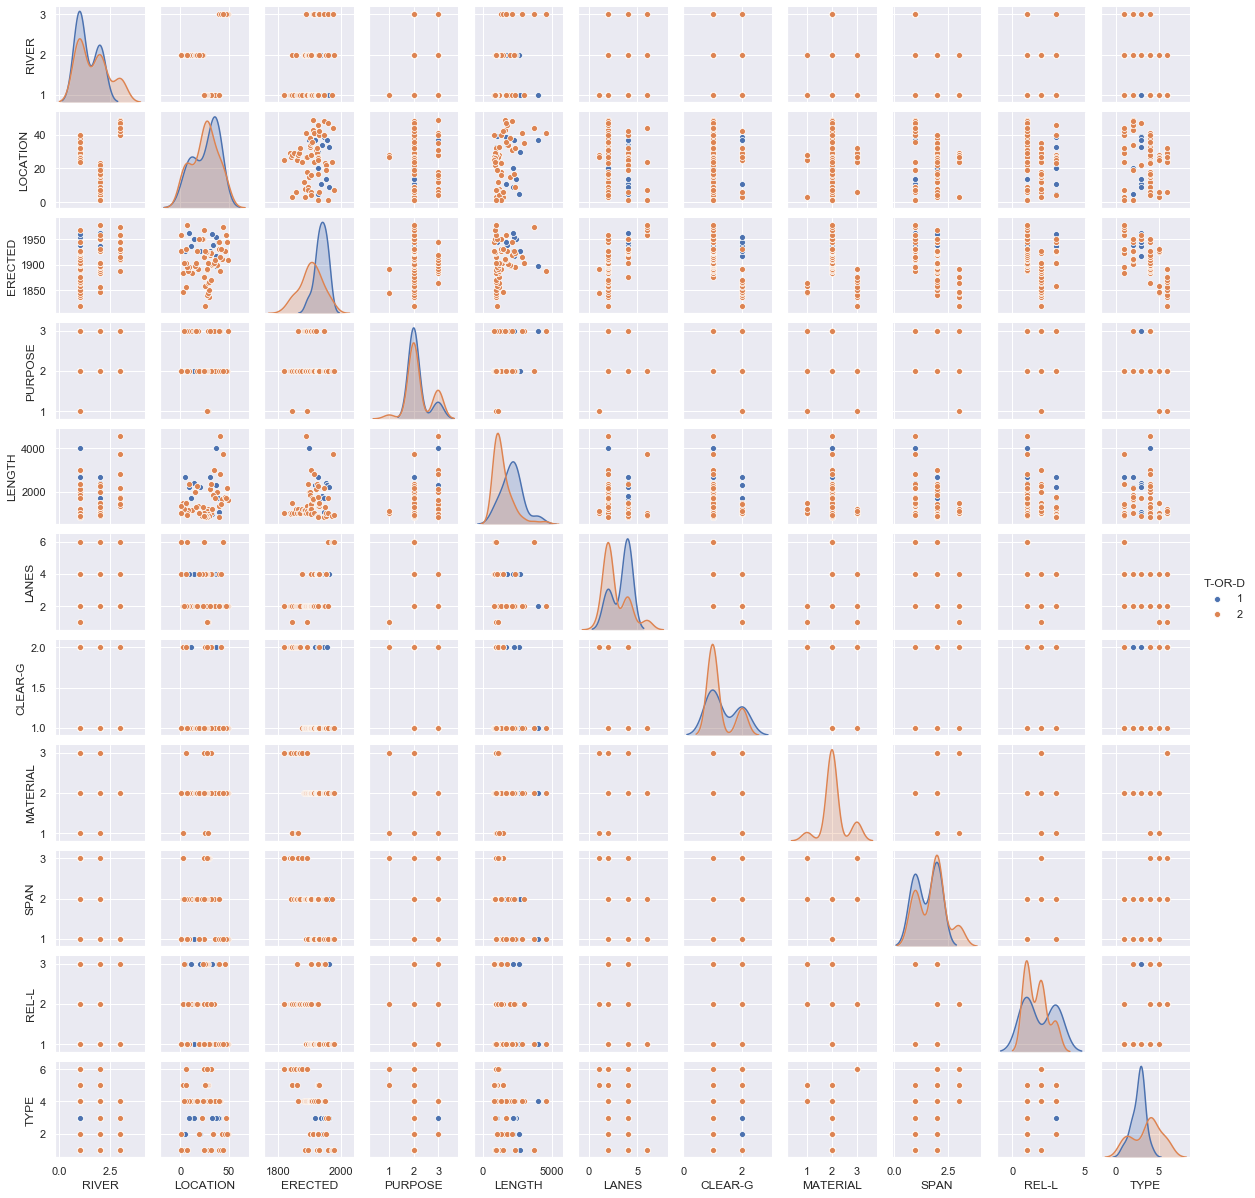

In [16]:
sns.pairplot(dataset, hue='T-OR-D', size=1.5)

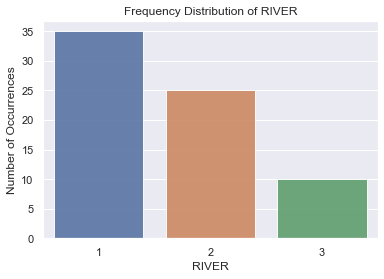

UnboundLocalError: local variable 'target_vals' referenced before assignment

In [18]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']
target_col = 'T-OR-D'
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='RIVER', columns_2_avoid=columns_2_avoid)

build_boxplot(dataset, predictor_name='RIVER', columns_2_avoid=columns_2_avoid, target_col='T-OR-D')

In [ ]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='T-OR-D', columns_2_avoid=columns_2_avoid)

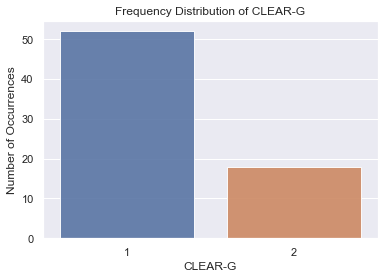

In [23]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='CLEAR-G', columns_2_avoid=columns_2_avoid)

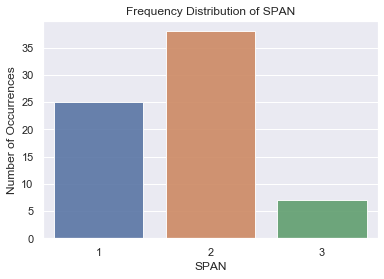

In [24]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='SPAN', columns_2_avoid=columns_2_avoid)

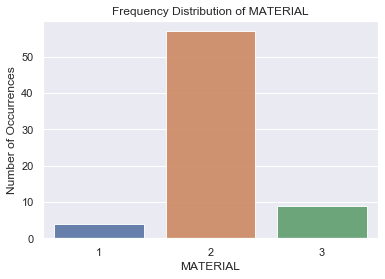

In [25]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='MATERIAL', columns_2_avoid=columns_2_avoid)

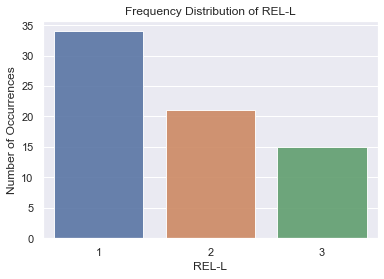

In [26]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='REL-L', columns_2_avoid=columns_2_avoid)

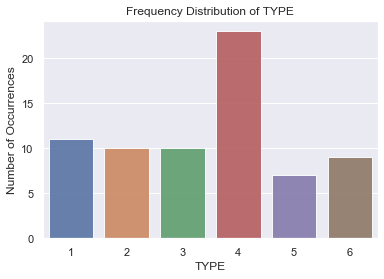

In [27]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='TYPE', columns_2_avoid=columns_2_avoid)

In [33]:
target = dataset['T-OR-D'].value_counts()
target_idx = target.index
target_vals = target.values
print(target_idx[0])


2


In [32]:
print(target_vals)

[57 13]


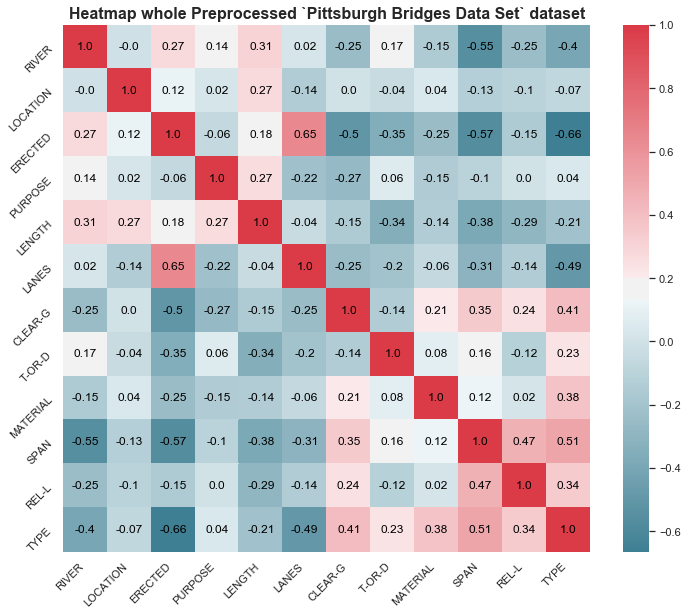

In [18]:
corr_result = dataset.corr()
display_heatmap(corr_result)

In [19]:
columns = dataset.columns
target_col = 'T-OR-D'

y = np.array(list(map(lambda x: 0 if x == 1 else 1, dataset[target_col].values)))
print(dataset['T-OR-D'].value_counts())
X = dataset.loc[:, dataset.columns != target_col]

2    57
1    13
Name: T-OR-D, dtype: int64


In [20]:
# Standardizing the features
# --------------------------------------------------------------------------- #
scaler_methods = ['minmax', 'standard', 'norm']
scaler_method = 'standard'
rescaledX = preprocessing_data_rescaling(scaler_method, X)

shape features matrix X, after normalizing:  (70, 11)


### Pricipal Component Analysis

After having investigate the data points inside the dataset, I move one to another section of my report where I decide to explore examples that made up the entire dataset using a particular technique in the field of statistical analysis that corresponds, precisely, to so called Principal Component Analysis. In fact, the major objective of this section is understand whether it is possible to transform, by means of some kind of linear transformation given by a mathematical calculation, the original data examples into reprojected representation that allows me to retrieve most useful information to be later exploited at training time. So, lets dive a bit whitin what is and which are main concepts, pros and cons about Principal Component Analysis.

Firstly, we know that **Principal Component Analysis**, more shortly PCA, is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called *principal components*. This transformation is defined in such a way that:
- the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible),
- and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

The resulting vectors, each being a linear combination of the variables and containing n observations, are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

PCA is mostly used as a tool in *exploratory data analysis* and for making predictive models, for that reasons I used such a technique here, before going through the different learning technique for producing my models.

#### Several Different Implementation

From the theory and the filed of research in statistics, we know that out there, there are several different implementation and way of computing principal component analysis, and each adopted technique has different performance as well as numerical stability. The three major derivations are:
- PCA by means of an iterative based procedure of extraing pricipal components one after the other selecting each time the one that account for the most of variance along its own axis, within the remainig subspace to be derived.
- The second possible way of performing PCA is done via calculation of *Covariance Matrix* applied to attributes, that are our independent predictive variables, used to represent data points.
- Lastly, it is used the technique known as *Singular Valued Decomposition* applied to the overall data points within our dataset.

Reading scikit-learn documentation, I discovered that PCA's derivation uses the *LAPACK implementation* of the *full SVD* or a *randomized truncated SVD* by the method of *Halko et al. 2009*, depending on the shape of the input data and the number of components to extract. Therefore I will descrive mainly that way of deriving the method with respect to the others that, instead, will be described more briefly and roughly.

#### PCA's Iterative based Method
Going in order, as depicted briefly above, I start describing PCA obtained by means of iterative based procedure to extract one at a time a new principal componet explointing the data points at hand.

We begin, recalling that, PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

We suppose to deal with a data matrix X, with column-wise zero empirical mean, where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature.

From a math poitn of view, the transformation is defined by a set of p-dimensional vectors of weights or coefficients $\mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}$ that map each row vector $\mathbf{x}_{(i)}$ of X to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{l})_{(i)}}$, given by: ${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}$.

In this way all the individual variables ${\displaystyle t_{1},\dots ,t_{l}}$ of t considered over the data set successively inherit the maximum possible variance from X, with each coefficient vector w constrained to be a unit vector.

More precisely, the first component In order to maximize variance has to satisfy the following expression:

${\displaystyle \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(t_{1}\right)_{(i)}^{2}\right\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$

So, with $w_{1}$ found, the first principal component of a data vector $x_{1}$ can then be given as a score $t_{1(i)} = x_{1} ⋅ w_{1}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, $(x_{1} ⋅ w_{1})w_{1}$.

The others remainig components are computed as folloes. The kth component can be found by subtracting the first k − 1 principal components from X, as in the following expression:

- ${\displaystyle \mathbf {\hat {X}} _{k}=\mathbf {X} -\sum _{s=1}^{k-1}\mathbf {X} \mathbf {w} _{(s)}\mathbf {w} _{(s)}^{\rm {T}}}$

- and then finding the weight vector which extracts the maximum variance from this new data matrix  ${\mathbf {w}}_{{(k)}}={\underset {\Vert {\mathbf {w}}\Vert =1}{\operatorname {arg\,max}}}\left\{\Vert {\mathbf {{\hat {X}}}}_{{k}}{\mathbf {w}}\Vert ^{2}\right\}={\operatorname {\arg \,max}}\,\left\{{\tfrac {{\mathbf {w}}^{T}{\mathbf {{\hat {X}}}}_{{k}}^{T}{\mathbf {{\hat {X}}}}_{{k}}{\mathbf {w}}}{{\mathbf {w}}^{T}{\mathbf {w}}}}\right\}$

It turns out that:
- from the formulas depicted above me get the remaining eigenvectors of $X^{T}X$, with the maximum values for the quantity in brackets given by their corresponding eigenvalues. Thus the weight vectors are eigenvectors of $X^{T}X$.
- The kth principal component of a data vector $x_(i)$ can therefore be given as a score $t_{k(i)} = x_{(i)} ⋅ w_(k)$ in the transformed co-ordinates, or as the corresponding vector in the space of the original variables, $(x_{(i)} ⋅ w_{(k)}) w_{(k)}$, where $w_{(k)}$ is the kth eigenvector of $X^{T}X$.
- The full principal components decomposition of X can therefore be given as: ${\displaystyle \mathbf {T} =\mathbf {X} \mathbf {W}}$, where W is a p-by-p matrix of weights whose columns are the eigenvectors of $X^{T}X$.

#### Covariance Matrix for PCA analysis

PCA made from covarian matrix computation requires the calculation of sample covariance matrix of the dataset as follows: $\mathbf{Q} \propto \mathbf{X}^T \mathbf{X} = \mathbf{W} \mathbf{\Lambda} \mathbf{W}^T$.

The empirical covariance matrix between the principal components becomes ${\displaystyle \mathbf {W} ^{T}\mathbf {Q} \mathbf {W} \propto \mathbf {W} ^{T}\mathbf {W} \,\mathbf {\Lambda } \,\mathbf {W} ^{T}\mathbf {W} =\mathbf {\Lambda } }$.


#### Singular Value Decomposition for PCA analysis

Finally, the principal components transformation can also be associated with another matrix factorization, the singular value decomposition (SVD) of X, ${\displaystyle \mathbf {X} =\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}}$, where more precisely:
- Σ is an n-by-p rectangular diagonal matrix of positive numbers $σ_{(k)}$, called the singular values of X;
- instead U is an n-by-n matrix, the columns of which are orthogonal unit vectors of length n called the left singular vectors of X;
- Then, W is a p-by-p whose columns are orthogonal unit vectors of length p and called the right singular vectors of X.

factorizingn the matrix ${X^{T}X}$, it can be written  as:

${\begin{aligned}\mathbf {X} ^{T}\mathbf {X} &=\mathbf {W} \mathbf {\Sigma } ^{T}\mathbf {U} ^{T}\mathbf {U} \mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\Sigma } ^{T}\mathbf {\Sigma } \mathbf {W} ^{T}\\&=\mathbf {W} \mathbf {\hat {\Sigma }} ^{2}\mathbf {W} ^{T}\end{aligned}}$

Where we recall that ${\displaystyle \mathbf {\hat {\Sigma }} }$ is the square diagonal matrix with the singular values of X and the excess zeros chopped off that satisfies ${\displaystyle \mathbf {{\hat {\Sigma }}^{2}} =\mathbf {\Sigma } ^{T}\mathbf {\Sigma } } {\displaystyle \mathbf {{\hat {\Sigma }}^{2}} =\mathbf {\Sigma } ^{T}\mathbf {\Sigma } }$. Comparison with the eigenvector factorization of $X^{T}X$ establishes that the right singular vectors W of X are equivalent to the eigenvectors of $X^{T}X$ , while the singular values $σ_{(k)}$ of X are equal to the square-root of the eigenvalues $λ_{(k)}$ of $X^{T}X$ . 

At this point we understand that using the singular value decomposition the score matrix T can be written as:

$\begin{align} \mathbf{T} & = \mathbf{X} \mathbf{W} \\ & = \mathbf{U}\mathbf{\Sigma}\mathbf{W}^T \mathbf{W} \\ & = \mathbf{U}\mathbf{\Sigma} \end{align}$

so each column of T is given by one of the left singular vectors of X multiplied by the corresponding singular value. This form is also the polar decomposition of T.

Efficient algorithms exist to calculate the SVD, as in scikit-learn package, of X without having to form the matrix $X^{T}X$, so computing the SVD is now the standard way to calculate a principal components analysis from a data matrix

In [21]:
n_components = rescaledX.shape[1]
# pca = PCA(n_components=n_components)
# pca = PCA(n_components=2)

# X_pca = pca.fit_transform(X)
# pca = pca.fit(rescaledX)
# X_pca = pca.transform(rescaledX)

In [ ]:
print(f"Cumulative varation explained(percentage) up to given number of pcs:")

tmp_data = []
principal_components = [pc for pc in '2,5,6,7,8,9,10'.split(',')]
for _, pc in enumerate(principal_components):
    n_components = int(pc)
    
    cum_var_exp_up_to_n_pcs = np.cumsum(pca.explained_variance_ratio_)[n_components-1]
    # print(f"Cumulative varation explained up to {n_components} pcs = {cum_var_exp_up_to_n_pcs}")
    # print(f"# pcs {n_components}: {cum_var_exp_up_to_n_pcs*100:.2f}%")
    tmp_data.append([n_components, cum_var_exp_up_to_n_pcs * 100])

tmp_df = pd.DataFrame(data=tmp_data, columns=['# PCS', 'Cumulative Varation Explained (percentage)'])
tmp_df.head(len(tmp_data))

In [ ]:
n_components = rescaledX.shape[1]
pca = PCA(n_components=n_components)
# pca = PCA(n_components=2)

#X_pca = pca.fit_transform(X)
pca = pca.fit(rescaledX)
X_pca = pca.transform(rescaledX)
    
fig = show_cum_variance_vs_components(pca, n_components)

# py.sign_in('franec94', 'QbLNKpC0EZB0kol0aL2Z')
# py.iplot(fig, filename='selecting-principal-components {}'.format(scaler_method))

#### Major Pros & Cons of PCA



## Learning Models <a class="anchor" id="learning-models"></a>

### Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem. Here I will provide an intuitive and brief explanation of how naive Bayes classifiers work, followed by its exploitation onto my datasets.

I start saying that Naive Bayes classifiers are built on Bayesian classification methods. These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.

n Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as P(L | features). Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$P(L|features)=\frac{P(features|L)}{P(L)P(features)}$

If we are trying to decide between two labels, and we call them L1 and L2, then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$\frac{P(L1 | features)}{P(L2 | features)}=\frac{P(features | L1)P(L1)}{P(features | L2)P(L2)}$

All we need now is some model by which we can compute P(features | $L_{i}$)

for each label. Such a model is called a generative model because it specifies the hypothetical random process that generates the data. Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier. The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

#### Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. In fact, one extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

The parameters $\sigma_{y}$ and $\mu_{y}$ are estimated usually using maximum likelihood.

In [ ]:
# naive_bayes_classifier_grid_search(rescaledX, y)

#### When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters


These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification. If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.

### Support Vector Machines Classifier

<img src="images/SVM_margin.png" alt="SVM Margin " style="width: 200px;"/>

Here, in this section I'm going to exploit a machine learning techinique known as Support Vectors Machines in order to detect and so select the best model I can produce throughout the usage of data points contained within the dataset at hand. So let discuss a bit those kind of classifiers.

In machine learning, **support-vector machines**, shortly SVMs, are *supervised learning models* with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a *non-probabilistic binary linear classifier*. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on the side of the gap on which they fall.

More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high-dimensional space, which can be used for classification, regression. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class, so-called *functional margin*, since in general the larger the margin, the lower the *generalization error* of the classifier.

#### Mathematical formulation of SVMs
Here, I'm going to describe the main mathematical properties and characteristics used to derive from a math point of view the algorithm derived and proven by researches when they have studied SVMs classifiers.

I start saying and recalling that A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class so-called functional margin, since in general the larger the margin the lower the generalization error of the classifier.

When demonstrating SVMs classifier algorithm I suppose that We are given a training dataset of *n*n points of the form:

\begin{align}
(\vec{x_1} y_1),..,(\vec{x_n},y_n)
\end{align}

where the $y_{1}$ are either 1 or −1, each indicating the class to which the point $\vec{x}_{i}$ belongs. Each $\vec{x}_{i}$is a *p-dimensional real vector*. We want to find the "maximum-margin hyperplane" that divides the group of points $\vec{x}_{i}$ for which $y_{1}$ = 1from the group of points for which $y_{1}$ = − 1, which is defined so that the distance between the hyperplane and the nearest point $\vec{x}_{i}$  from either group is maximized.

Any hyperplane can be written as the set of points $\vec{x}_{i}$  satisfying : $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = 0$; where  $\vec{w}_{i}$ is the, even if not necessarily, normal vector to the hyperplane. The parameter $\tfrac {b}{\|\vec{w}\|}$ determines the offset of the hyperplane from the origin along the normal vector $\vec{x}_{i}$.

Arrived so far, I have to distiguish between two distinct cases which both depende on the nature of data points that generally made up a given dataset. Those two different cases are called *Hard-Margin* and *Soft Margin* and, respectively.

The first case, so the ***Hard-Margin*** case, happens just for really optimistics datasets. In fact it is the case when the training data is linearly separable, hence, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations:
- $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = 1$, that is anything on or above this boundary is of one class, with label 1;
- and, $\vec{w}_{i}\cdot{\vec{x}_{i}} - b = -1$, that is anything on or above this boundary is of one class, with label -1.

We can notice also that the distance between these two hyperplanes is ${\displaystyle {\tfrac {2}{\|{\vec {w}}\|}}}$ so to maximize the distance between the planes we want to minimize ‖ w → ‖ {\displaystyle \|{\vec {w}}\|} \|{\vec {w}}\|. The distance is computed using the distance from a point to a plane equation. We also have to prevent data points from falling into the margin, we add the following constraint: for each *i*:
- either, ${\displaystyle {\vec {w}}\cdot {\vec {x}}_{i}-b\geq 1}$, ${\displaystyle y_{i}=1}$;
- or, ${\displaystyle {\vec {w}}\cdot {\vec {x}}_{i}-b\leq -1}$, if ${\displaystyle y_{i}=-1}$.

These constraints state that each data point must lie on the correct side of the margin.
Finally, we collect all the previous observations and define the following optimization problem:
- from $y_{i}(\vec{w}_{i}\cdot{\vec{x}_{i}} - b) \geq 1$, for all $1 \leq i \leq n$;
- to minimize ${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\geq 1}$ ${\displaystyle i=1,\ldots ,n}$.

The classifier we obtain is made from ${\vec {w}}$ and ${\displaystyle b}$ that solve this problem, and he max-margin hyperplane is completely determined by those ${\vec {x}}_{i}$ that lie nearest to it. These $\vec{x}_{i}$ are called *support vectors*.

The other case, so the ***Soft-Margin*** case, convercely happens when the training data is not linearly separable. To deal with such situation, as well as, to extend SVM to cases in which the data are not linearly separable, we introduce the hinge loss function, that is: $max(y_{i}(\vec{w}_{i}\cdot{\vec{x}_{i}} - b))$.
Once we have provided the new loss function we go ahead with the new optimization problem that we aim at minimizing that is:

\begin{align}
{\displaystyle \left[{\frac {1}{n}}\sum _{i=1}^{n}\max \left(0,1-y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)\right)\right]+\lambda \lVert {\vec {w}}\rVert ^{2},}
\end{align}

where the parameter \lambda determines the trade-off between increasing the margin size and ensuring that the ${\vec {x}}_{i}$ lie on the correct side of the margin. Thus, for sufficiently small values of\lambda , the second term in the loss function will become negligible, hence, it will behave similar to the hard-margin SVM, if the input data are linearly classifiable, but will still learn if a classification rule is viable or not.

What we notice from last equations written just above is that we deal with a quadratic programming problem, and its solution is provided, detailed below.

We start defining a *Primal Problem* as follow:
- For each $\{1,\,\ldots ,\,n\}$ we introduce a variable ${\displaystyle \zeta _{i}=\max \left(0,1-y_{i}(w\cdot x_{i}-b)\right)}$. Note that ${\displaystyle \zeta _{i}}$ is the smallest nonnegative number satisfying ${\displaystyle y_{i}(w\cdot x_{i}-b)\geq 1-\zeta _{i}}$;
- we can rewrite the optimization problem as follows: ${\displaystyle {\text{minimize }}{\frac {1}{n}}\sum _{i=1}^{n}\zeta _{i}+\lambda \|w\|^{2}}$,  ${\displaystyle {\text{subject to }}y_{i}(w\cdot x_{i}-b)\geq 1-\zeta _{i}\,{\text{ and }}\,\zeta _{i}\geq 0,\,{\text{for all }}i.}$

However, by solving for the *Lagrangian dual* of the above problem, one obtains the simplified problem:
\begin{align}
    {\displaystyle {\text{maximize}}\,\,f(c_{1}\ldots c_{n})=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(x_{i}\cdot x_{j})y_{j}c_{j},} \\
{\displaystyle {\text{subject to }}\sum _{i=1}^{n}c_{i}y_{i}=0,\,{\text{and }}0\leq c_{i}\leq {\frac {1}{2n\lambda }}\;{\text{for all }}i.} 
\end{align}
- moreover, the variables $c_i$ are defined as ${\displaystyle {\vec {w}}=\sum _{i=1}^{n}c_{i}y_{i}{\vec {x}}_{i}}$. Where, ${\displaystyle c_{i}=0}$ exactly when ${\displaystyle {\vec {x}}_{i}}$ lies on the correct side of the margin, and ${\displaystyle 0<c_{i}<(2n\lambda )^{-1}}$ when ${\vec {x}}_{i}$ lies on the margin's boundary. It follows that ${\displaystyle {\vec {w}}}$ can be written as a linear combination of the support vectors.

The offset, ${\displaystyle b}$, can be recovered by finding an ${\vec {x}}_{i}$ on the margin's boundary and solving: ${\displaystyle y_{i}({\vec {w}}\cdot {\vec {x}}_{i}-b)=1\iff b={\vec {w}}\cdot {\vec {x}}_{i}-y_{i}.}$ 

This is called the *dual problem*. Since the dual maximization problem is a quadratic function of the ${\displaystyle c_{i}}$ subject to linear constraints, it is efficiently solvable by quadratic programming algorithms.

Lastly, I will discuss what in the context of SVMs classifier is called as ***Kernel Trick***.
Roughly speaking, we know that a possible way of dealing with datasets that are not linearly separable but that can become linearnly separable within an higher dimensional space, or feature space, we can try to remap the original data points into a higher order feature space by means of some kind of remapping function, hence, solve the SVMs classifier optimization problem to find out a linear classifier in that new larger feature space. Then, we project back to the original feature space the solution we have found, reminding that in the hold feature space the decision boundaries founded will be non-linear, but still allow to classify new examples.

Usually, especially, dealing with large datasets or with datasets with large set of features this approach becomes computationally intensive and and unfeasible if we run out of memory. So, in other words, the procedure is constrained in time and space, and might become time consuming or even unfeasible because of the large amount of memory we have to exploit.

An reasonable alternative is represented by the usage of kernel functions that are function which satisfy ${\displaystyle k({\vec {x}}_{i},{\vec {x}}_{j})=\varphi ({\vec {x}}_{i})\cdot \varphi ({\vec {x}}_{j})}$, where we recall that classification vector ${\vec {w}}$ in the transformed space satisfies ${\displaystyle {\vec {w}}=\sum _{i=1}^{n}c_{i}y_{i}\varphi ({\vec {x}}_{i}),}$
where, the ${\displaystyle c_{i}}$ are obtained by solving the optimization problem:

${\displaystyle {\begin{aligned}{\text{maximize}}\,\,f(c_{1}\ldots c_{n})&=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}(\varphi ({\vec {x}}_{i})\cdot \varphi ({\vec {x}}_{j}))y_{j}c_{j}\\&=\sum _{i=1}^{n}c_{i}-{\frac {1}{2}}\sum _{i=1}^{n}\sum _{j=1}^{n}y_{i}c_{i}k({\vec {x}}_{i},{\vec {x}}_{j})y_{j}c_{j}\\\end{aligned}}}$

${\displaystyle {\text{subject to }}\sum _{i=1}^{n}c_{i}y_{i}=0,\,{\text{and }}0\leq c_{i}\leq {\frac {1}{2n\lambda }}\;{\text{for all }}i.}$

The coefficients ${\displaystyle c_{i}}$ can be solved for using quadratic programming, and we can find some index ${\displaystyle i}$ such that ${\displaystyle 0<c_{i}<(2n\lambda )^{-1}}$, so that ${\displaystyle \varphi ({\vec {x}}_{i})}$ lies on the boundary of the margin in the transformed space, and then solve, by substituting doto product between remapped data points with kernel function applied upon the same arguments:

${\displaystyle {\begin{aligned}b={\vec {w}}\cdot \varphi ({\vec {x}}_{i})-y_{i}&=\left[\sum _{j=1}^{n}c_{j}y_{j}\varphi ({\vec {x}}_{j})\cdot \varphi ({\vec {x}}_{i})\right]-y_{i}\\&=\left[\sum _{j=1}^{n}c_{j}y_{j}k({\vec {x}}_{j},{\vec {x}}_{i})\right]-y_{i}.\end{aligned}}}$

Finally, ${\displaystyle {\vec {z}}\mapsto \operatorname {sgn}({\vec {w}}\cdot \varphi ({\vec {z}})-b)=\operatorname {sgn} \left(\left[\sum _{i=1}^{n}c_{i}y_{i}k({\vec {x}}_{i},{\vec {z}})\right]-b\right).}$

What follows is a briefly list of the most commonly used kernel functions. They should be fine tuned, by means of a either grid search or random search approaches, identifying the best set of values to replace whitin the picked kernel function, where the choice depend on the dataset at hand:
- Polynomial (homogeneous): ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=({\vec {x_{i}}}\cdot {\vec {x_{j}}})^{d}}$.
- Polynomial (inhomogeneous): ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=({\vec {x_{i}}}\cdot {\vec {x_{j}}}+1)^{d}}$.
- Gaussian radial basis function: ${\displaystyle \gamma =1/(2\sigma ^{2})} {\displaystyle \gamma =1/(2\sigma ^{2})}$.
- Hyperbolic tangent: ${\displaystyle k({\vec {x_{i}}},{\vec {x_{j}}})=\tanh(\kappa {\vec {x_{i}}}\cdot {\vec {x_{j}}}+c)}$ for some (not every) ${\displaystyle \kappa >0}$ and ${\displaystyle c<0}$.

What follows is the application or use of SVMs classifier for learning a model that best fit the training data in order to be able to classify new instance in a reliable way, selecting the most promising model trained.

In [ ]:
kernel_type = 'svm-rbf-kernel'
# svm_linear_classifier_grid_search(rescaledX, y, kernel_type)

#### Advantages and Backwards of SVMs

Finally, I conclude this section providing a description of major advantages and backwards of such a machine learning technique, that have been noticed by researches who studied SVMs properties. The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

On the other and, the disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

### Decision Tree Models

Decision Trees, for short DTs, are a *non-parametric supervised learning method* used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Their mathematical formulation is generally provided as follows: Given training vectors $x_{i} \in R^{n}$, $i=1,…, l$ and a label vector $y \in R^{l}$, a decision tree recursively partitions the space such that the samples with the same labels are grouped together.

Let the data at node $m$ be represented by $Q$. For each candidate split $\theta = (j, t_{m})$
consisting of a feature $j$ and threshold $t_{m}$, partition the data into $Q_{left}(\theta)$ and $Q_{left}(\theta)$ subsets as:

\begin{align}\begin{aligned}Q_{left}(\theta) = {(x, y) | x_j <= t_m}\\Q_{right}(\theta) = Q \setminus Q_{left}(\theta)\end{aligned}\end{align}

The impurity at $m$ is computed using an impurity function $H()$, the choice of which depends on the task being solved (classification or regression) like:

\begin{align}
G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta)) + \frac{n_{right}}{N_m} H(Q_{right}(\theta))
\end{align}

Select the parameters that minimises the impurity: $\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)$.

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ until the maximum allowable depth is reached,
$N_m < \min_{samples}$ or N_m = 1.

Speaking about *Classification Criteria* referred to the procedure used for learining or fit to the data a decision tree we can state what follows: If a target is a classification outcome taking on values $0,1,…,K-1$, for node $m$, representing a region $R_{m}$ with $N_{m}$ observations, let $p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)$ be the proportion of class $k$ observations in node $m$.

So, Common measures of impurity are:
- Gini, specified as $H(X_m) = \sum_k p_{mk} (1 - p_{mk})$
- Entropy, definead as $(X_m) = - \sum_k p_{mk} \log(p_{mk})$

where, we recall that $X_{m}$ is the training data in node  $m$.

In [ ]:
# decision_tree_classifier_grid_search(rescaledX, y)

#### Decision Tree's Advantages & Bacwards

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



### Ensemble methods

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:
- In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. So, some examples are: Bagging methods, Forests of randomized trees, but still exist more classifiers;
- Instead, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. Hence, some examples are: AdaBoost, Gradient Tree Boosting,but still exist more options.

#### Random Forests

The **sklearn.ensemble module** includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method. Both algorithms are perturb-and-combine techniques, specifically designed for trees. This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

The main parameters to adjust when using these methods is *number of estimators* and *maxima features*. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias.

Empirical good default values are maxima features equals to null, that means always considering all features instead of a random subset, for regression problems, and maxima features equals to "sqrt", using a random subset of size sqrt(number of features)) for classification tasks, where number of features is the number of features in the data. The best parameter values should always be cross-validated.

We note that the size of the model with the default parameters is $O( M * N * log (N) )$, where $M$ is the number of trees and $N$ is the number of samples.

In [ ]:
# random_forest_classifier_grid_search(rescaledX, y)

### Improvements and Conclusions <a class="anchor" id="Improvements-and-conclusions"></a>

### References  <a class="anchor" id="references"></a>
- Data Domain Information part:
    - (Deck) https://en.wikipedia.org/wiki/Deck_(bridge)
    - (Cantilever bridge) https://en.wikipedia.org/wiki/Cantilever_bridge
    - (Arch bridge) https://en.wikipedia.org/wiki/Deck_(bridge)
- Machine Learning part:
    - (Theory Book) https://jakevdp.github.io/PythonDataScienceHandbook/
    - (Decsion Trees) https://scikit-learn.org/stable/modules/tree.html#tree
    - (SVM) https://scikit-learn.org/stable/modules/svm.html
    - (PCA) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
- Chart part:
    - (Seaborn Charts) https://acadgild.com/blog/data-visualization-using-matplotlib-and-seaborn
- Markdown Math part:
    - https://share.cocalc.com/share/b4a30ed038ee41d868dad094193ac462ccd228e2/Homework%20/HW%201.2%20-%20Markdown%20and%20LaTeX%20Cheatsheet.ipynb?viewer=share
    - https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html